In [1]:
%cd C:\Users\ASUS\Documents\Dataset_Hackathon\archive

C:\Users\ASUS\Documents\Dataset_Hackathon\archive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pickle
import tensorflowjs as tfjs

In [3]:
data = pd.read_csv('CO2 Emissions_Canada.csv')

In [4]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [56]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [57]:
data = data.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)'], axis=1)
data.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,196
1,2.4,4,Z,11.2,7.7,221
2,1.5,4,Z,6.0,5.8,136
3,3.5,6,Z,12.7,9.1,255
4,3.5,6,Z,12.1,8.7,244


# EDA

In [58]:
fuel_type = data['Fuel Type']

In [59]:
fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

In [65]:
# one hot encode
encode = {}

new_value = {'Z':'premium gasoline',
            'X' : 'regular gasoline',
            'D' : 'diesel',
            'E' : 'ethanol (E85)',
            'N' : 'natural gas'}
# for index in range (len(np.unique(fuel_type))):
#     encode.update({fuel_type.value_counts().index[index] : i})
#     i += 1
    
onehot = {'Fuel Type': new_value}
data.replace(onehot, inplace=True)

In [66]:
fuel_type.value_counts()

regular gasoline    3637
premium gasoline    3202
ethanol (E85)        370
diesel               175
natural gas            1
Name: Fuel Type, dtype: int64

In [67]:
data.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
0,2.0,4,premium gasoline,9.9,6.7,196
1,2.4,4,premium gasoline,11.2,7.7,221
2,1.5,4,premium gasoline,6.0,5.8,136
3,3.5,6,premium gasoline,12.7,9.1,255
4,3.5,6,premium gasoline,12.1,8.7,244


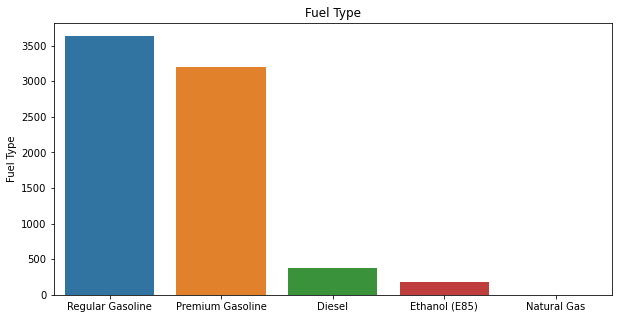

In [68]:
y_axis = fuel_type.value_counts()
x_axis = ['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Ethanol (E85)', 'Natural Gas']

fig = plt.figure(figsize = (10, 5))
sns.barplot(x =x_axis , y=y_axis, data=data).set(title='Fuel Type')
plt.show()

In [69]:
numerical_data = ['Engine Size(L)','Cylinders',  'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']

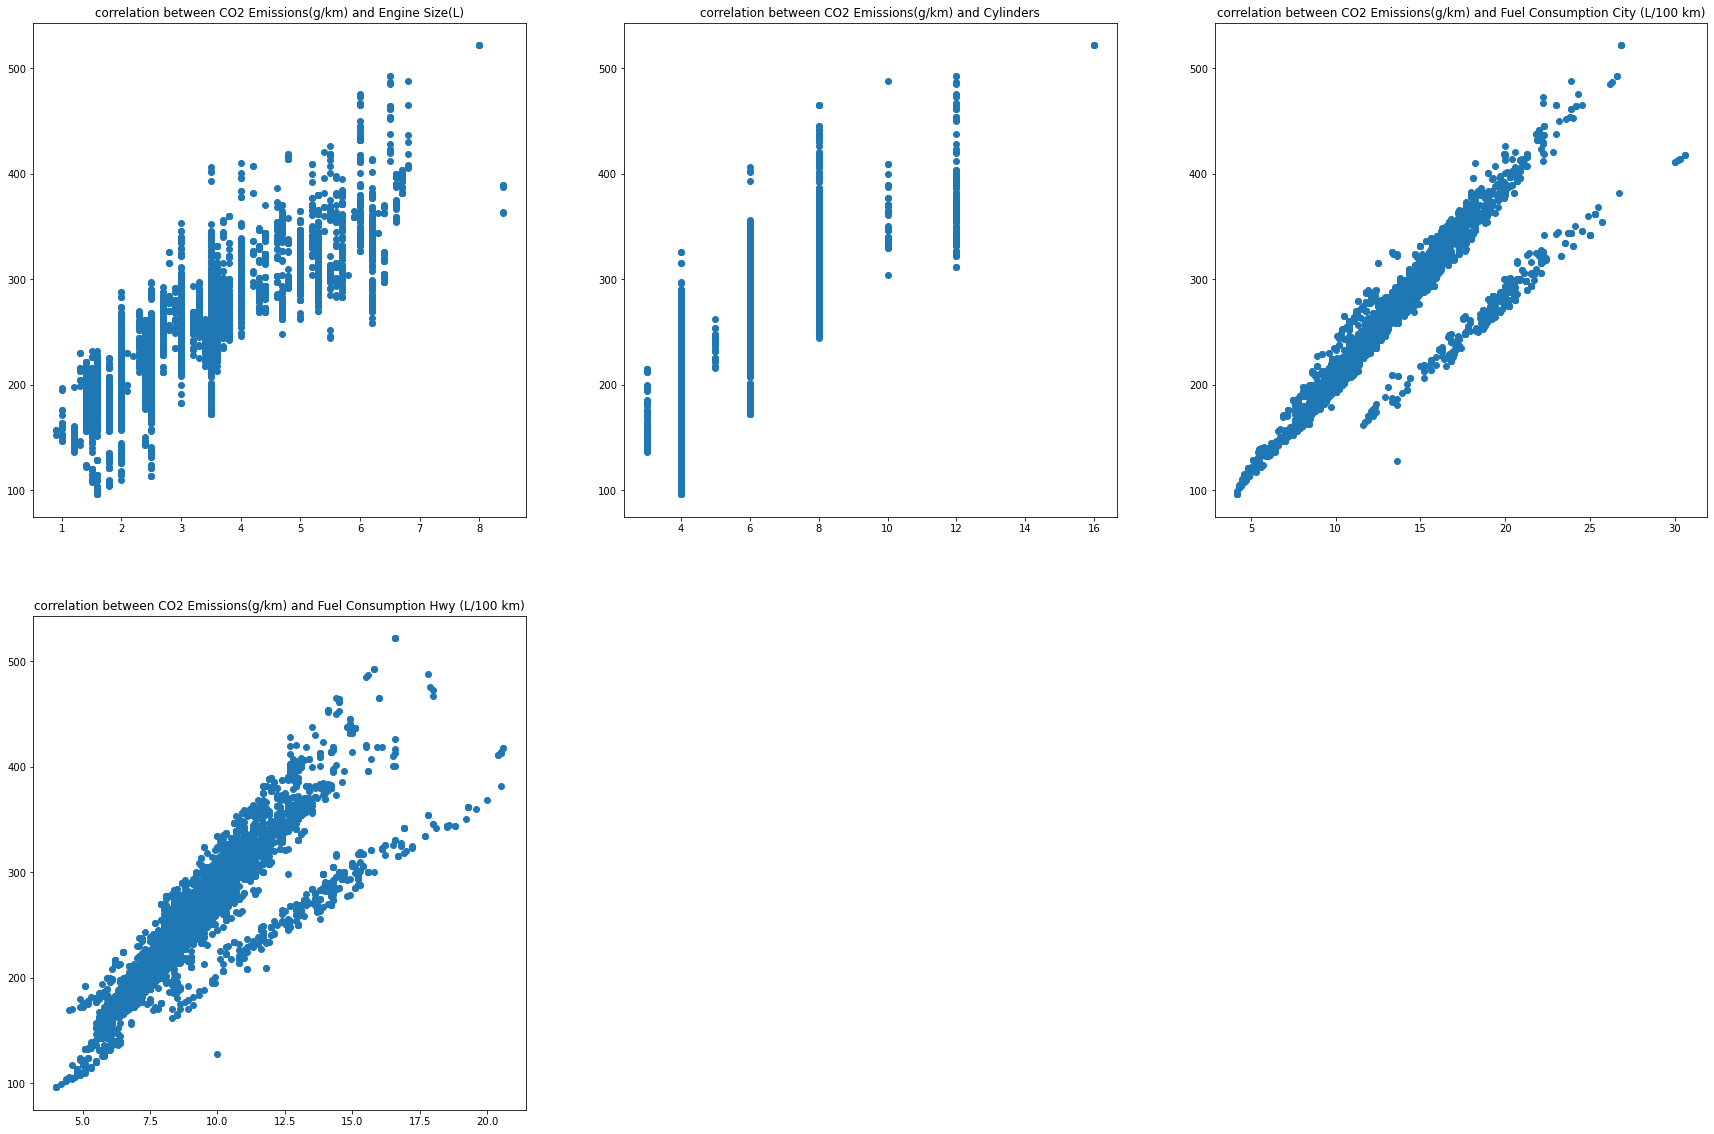

In [70]:
fig = plt.figure(figsize=(30,20))

for index in range(len(numerical_data)):
    ax = fig.add_subplot(2,3,index+1)
    ax.set_title('correlation between CO2 Emissions(g/km) and {}'.format(numerical_data[index]))
    ax.scatter( data[numerical_data[index]], data['CO2 Emissions(g/km)'])
plt.show()

In [71]:
np.unique(fuel_type)

array(['diesel', 'ethanol (E85)', 'natural gas', 'premium gasoline',
       'regular gasoline'], dtype=object)

In [15]:
# # one hot encode
# encode = {}
# i = 0
# for index in range (len(np.unique(fuel_type))):
#     encode.update({fuel_type.value_counts().index[index] : i})
#     i += 1
    
# onehot = {'Fuel Type': encode}
# data.replace(onehot, inplace=True)

In [72]:
onehot = pd.get_dummies(data, columns=['Fuel Type'])

In [73]:
onehot.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km),Fuel Type_diesel,Fuel Type_ethanol (E85),Fuel Type_natural gas,Fuel Type_premium gasoline,Fuel Type_regular gasoline
0,2.0,4,9.9,6.7,196,0,0,0,1,0
1,2.4,4,11.2,7.7,221,0,0,0,1,0
2,1.5,4,6.0,5.8,136,0,0,0,1,0
3,3.5,6,12.7,9.1,255,0,0,0,1,0
4,3.5,6,12.1,8.7,244,0,0,0,1,0


In [74]:
data_clean = onehot

In [75]:
x = data_clean.drop(['CO2 Emissions(g/km)'], axis=1)
y = data_clean['CO2 Emissions(g/km)']

In [76]:
x

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Type_diesel,Fuel Type_ethanol (E85),Fuel Type_natural gas,Fuel Type_premium gasoline,Fuel Type_regular gasoline
0,2.0,4,9.9,6.7,0,0,0,1,0
1,2.4,4,11.2,7.7,0,0,0,1,0
2,1.5,4,6.0,5.8,0,0,0,1,0
3,3.5,6,12.7,9.1,0,0,0,1,0
4,3.5,6,12.1,8.7,0,0,0,1,0
5,3.5,6,11.9,7.7,0,0,0,1,0
6,3.5,6,11.8,8.1,0,0,0,1,0
7,3.7,6,12.8,9.0,0,0,0,1,0
8,3.7,6,13.4,9.5,0,0,0,1,0
9,2.4,4,10.6,7.5,0,0,0,1,0


Text(0.5, 1.0, 'Correlation Matrix for Numeric Feature ')

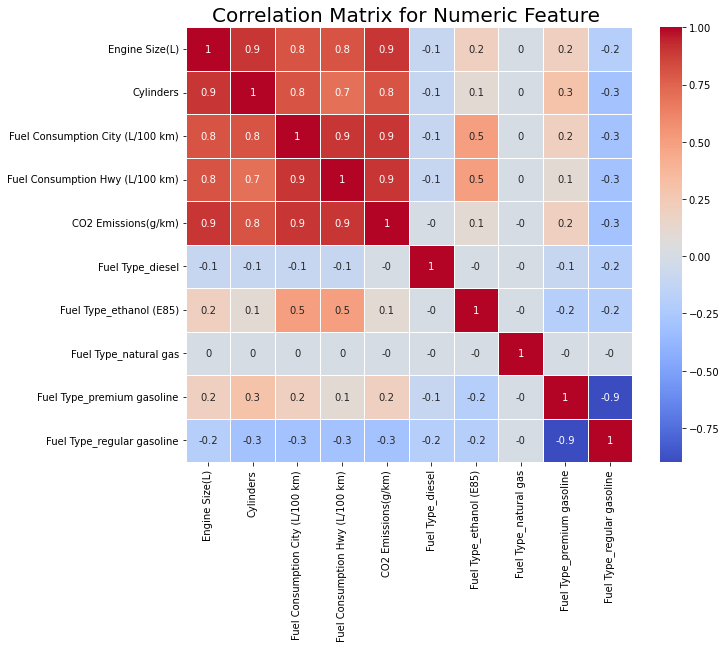

In [77]:
# Show correlation between each features using heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_clean.corr().round(1)

#To print score in the box, use anot=True parameter
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for Numeric Feature ", size=20)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Modelling

In [155]:
mae = []
accuracy = []

## Linear Regression

In [80]:
lr_parameters = {'fit_intercept':[True, False],
                'normalize': [True, False],
                'n_jobs': [10, 30, 50, 70, 90, 100]}

grid = RandomizedSearchCV(LinearRegression(),
                   lr_parameters)

grid.fit(x_train, y_train)
print('best estimator: {}'.format(grid.best_estimator_))
print('best parameters: {}'.format(grid.best_params_))
print('best score: {}'.format(grid.best_score_))

best estimator: LinearRegression(fit_intercept=False, n_jobs=90)
best parameters: {'normalize': False, 'n_jobs': 90, 'fit_intercept': False}
best score: 0.9914075242130984


In [81]:
lr_model = LinearRegression(fit_intercept=False, n_jobs=30).fit(x_train, y_train)

In [82]:
lr_predict = lr_model.predict(x_test)

In [156]:
lr_r2_accuracy = r2_score(y_test, lr_predict)
lr_mae = mean_absolute_error(y_test, lr_predict)

accuracy.append(lr_r2_accuracy)
mae.append(lr_mae)
print('Linear Regression Accuracy: {}'.format(lr_r2_accuracy))
print('Linear Regression MAE: {}'.format(lr_mae))
print('Linear Regression Coeffiecient: {} '.format(lr_model.coef_))
print('Linear Regression Intercept: {} '.format(lr_model.intercept_))

Linear Regression Accuracy: 0.9897525217580515
Linear Regression MAE: 3.19897310019166
Linear Regression Coeffiecient: [ 2.07393131e-01  5.58837875e-01  1.26026616e+01  9.63170930e+00
  3.68156397e+01 -1.07031052e+02  8.52651283e-14  6.43361376e+00
  6.44428064e+00] 
Linear Regression Intercept: 0.0 


In [84]:
# prediction = lr_model.predict([[2.0,4, 9.9,6.7,0,0,0,0,1]])

## Ridge Regression

In [85]:
ridge_parameters = {'fit_intercept':[True, False],
                 'alpha':[1.0, 2.0, 3.0, 4.0, 5.0],
                'normalize': [True, False],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid = RandomizedSearchCV(Ridge(),
                   ridge_parameters)

grid.fit(x_train, y_train)
print('best estimator: {}'.format(grid.best_estimator_))
print('best parameters: {}'.format(grid.best_params_))
print('best score: {}'.format(grid.best_score_))

best estimator: Ridge(solver='svd')
best parameters: {'solver': 'svd', 'normalize': False, 'fit_intercept': True, 'alpha': 1.0}
best score: 0.9914017739699087


In [86]:
ridge_model = Ridge(alpha=2.0, solver='svd').fit(x_train, y_train)

In [87]:
ridge_predict = ridge_model.predict(x_test)

In [157]:
ridge_r2_score = r2_score(y_test, ridge_predict)
ridge_mae = mean_absolute_error(y_test, ridge_predict)
accuracy.append(ridge_r2_score)
mae.append(ridge_mae)

print('Ridge Accuracy: {}'.format(ridge_r2_score))
print('Ridge MAE: {}'.format(ridge_mae))
print('Ridge Coeffiecient: {} '.format(ridge_model.coef_))
print('Ridge Intercept: {} '.format(ridge_model.intercept_))

Ridge Accuracy: 0.9901867328290804
Ridge MAE: 3.2219401802705407
Ridge Coeffiecient: [ 2.69113834e-01  6.14969786e-01  1.25438767e+01  9.59577360e+00
  5.02267283e+01 -9.16387036e+01  1.69718220e-14  2.07157152e+01
  2.06962602e+01] 
Ridge Intercept: -13.74927307219616 


# Random Forest Regressor

In [89]:
forest_parameters = {'n_estimators':[100, 200, 300, 400, 500],
                     'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                     'min_samples_split':[2,4,6,8,10],
                     'min_samples_leaf':[1,3,5,7,9],
                     'max_features': ['sqrt', 'log2', None]
                }

grid = RandomizedSearchCV(RandomForestRegressor(),
                   forest_parameters)

grid.fit(x_train, y_train)
print('best estimator: {}'.format(grid.best_estimator_))
print('best parameters: {}'.format(grid.best_params_))
print('best score: {}'.format(grid.best_score_))

best estimator: RandomForestRegressor(max_depth=50, max_features=None, min_samples_split=8)
best parameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50}
best score: 0.9969256156772686


In [90]:
random_forest = grid.best_estimator_.fit(x_train, y_train)

In [91]:
random_forest_predict = random_forest.predict(x_test)

In [158]:
random_forest_r2_score = r2_score(y_test, random_forest_predict)
random_forest_mae = mean_absolute_error(y_test, random_forest_predict)
accuracy.append(random_forest_r2_score)
mae.append(random_forest_mae)

print('Random Forest Regressor Accuracy: {}'.format(random_forest_r2_score))
print('Random Forest Regressor MAE: {}'.format(random_forest_mae))

Random Forest Regressor Accuracy: 0.9964343671352903
Random Forest Regressor MAE: 1.9941006524153795


# Neural Network

In [93]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'loss',
                        patience = 2,
                        verbose = 1)


In [146]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_shape = [9], activation ='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
#     tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Dense(1, activation = 'linear')
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                loss= 'mean_absolute_error',
                metrics = ['mae'])

nn_model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
185/185 [==============================] - 1s 4ms/step - loss: 95.4432 - mae: 95.4432
Epoch 2/500
185/185 [==============================] - 1s 3ms/step - loss: 9.6045 - mae: 9.6045
Epoch 3/500
185/185 [==============================] - 1s 3ms/step - loss: 7.4913 - mae: 7.4913
Epoch 4/500
185/185 [==============================] - 1s 3ms/step - loss: 5.9307 - mae: 5.9307
Epoch 5/500
185/185 [==============================] - 1s 4ms/step - loss: 4.2145 - mae: 4.2145
Epoch 6/500
185/185 [==============================] - 1s 4ms/step - loss: 3.2315 - mae: 3.2315
Epoch 7/500
185/185 [==============================] - 1s 4ms/step - loss: 3.0873 - mae: 3.0873
Epoch 8/500
185/185 [==============================] - 1s 4ms/step - loss: 2.9706 - mae: 2.9706
Epoch 9/500
185/185 [==============================] - 1s 3ms/step - loss: 2.9930 - mae: 2.9930
Epoch 10/500
185/185 [==============================] - 1s 3ms/step - loss: 2.9306 - mae: 2.9306
Epoch 11/500
185/185 [===============

In [160]:
nn_model_predict = nn_model.predict(x_test)

47/47 [==============================] - 0s 2ms/step


In [162]:
nn_r2_score = r2_score(y_test,nn_model_predict)
nn_mae = mean_absolute_error(y_test,nn_model_predict)

accuracy.append(nn_r2_score)
mae.append(nn_mae)

print('Neural Network Accuracy: {}'.format(nn_r2_score))
print('Neural Network MAE: {}'.format(nn_mae))

Neural Network Accuracy: 0.995912668196587
Neural Network MAE: 2.2742415307418833


# Evaluate Model

In [163]:
evaluate_dict = {'accuracy': accuracy,
                 'mae': mae}

evaluate_model = pd.DataFrame(evaluate_dict)

In [164]:
rows_name = ['Logistic_Regression', 'Ridge_Regression', 'Random_Forest', 'Neural_Network']

In [165]:
evaluate_model.index = rows_name

In [166]:
evaluate_model

,accuracy,mae
Logistic_Regression,0.989753,3.198973
Ridge_Regression,0.990187,3.221940
Random_Forest,0.996434,1.994101
Neural_Network,0.995913,2.274242


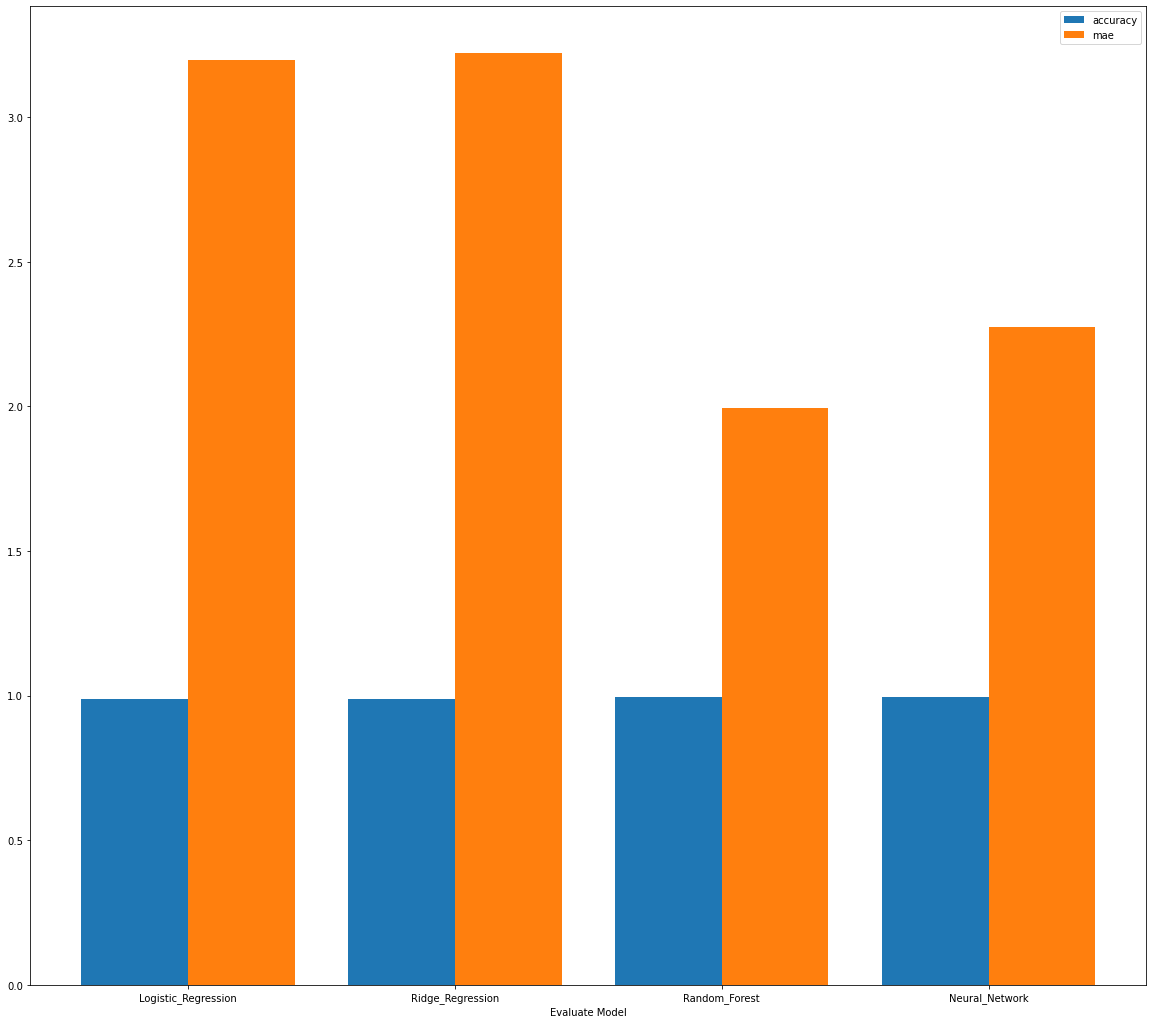

In [167]:
x_axis= np.arange(len(rows_name))

plt.figure(figsize=(20,18))
plt.bar(x_axis - 0.2, accuracy, 0.4, label='accuracy')
plt.bar(x_axis + 0.2, mae, 0.4, label = 'mae')

plt.xticks(x_axis, rows_name)
plt.xlabel("Evaluate Model")
plt.legend()
plt.show()

# Save Model

In [150]:
pickles = ['linear_regression_model.pkl', 'ridge_regression_model.pkl','random_forest_model.pkl' ]
ml_models = [lr_model, ridge_model, random_forest]

In [151]:
for index in range (len(pickles)):
    with open(pickles[index], 'wb') as file:
        pickle.dump(ml_models[index], file)

In [154]:
#test load random forest
with open('random_forest_model.pkl', 'rb') as file:
    load_model = pickle.load(file)
    
load_predict = load_model.predict(x_test)
print(r2_score(y_test, load_predict))

0.9964343671352903


In [ ]:
nn_model.save('nn_regression.h5')

In [23]:
# convert neural network model into tfjs
tfjs.converters.save_keras_model(nn_model, 'C:/Users/ASUS/Documents/Dataset_Hackathon/Transportation_Emission_Prediction/models/tfjs_model')

# Prediction Model

In [102]:
fuel = ['Regular Gasoline', 'Premium Gasoline','Ethanol (E85)', 'Diesel', 'Natural Gas']

In [140]:
reg = nn_model.predict([[2.0,4, 9.9,6.7,0,0,0,0,1]])
premium = nn_model.predict([[2.0,4, 9.9,6.7,0,0,0,1,0]])
ethanol = nn_model.predict([[2.0,4, 9.9,6.7,0,0,1,0,0]])
diesel = nn_model.predict([[2.0,4, 9.9,6.7,0,1,0,0,0]])
natural = nn_model.predict([[2.0,4, 9.9,6.7,1,0,0,0,0]])

1/1 [==============================] - 0s 29ms/step


In [141]:
print(reg)
print(premium)
print(ethanol)
print(diesel)
print(natural)

[[196.1502]]
[[196.58784]]
[[198.21204]]
[[144.2308]]
[[227.60071]]
